In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

In [2]:
#all_songs of 5000 songs from a large spotify playlist
all_songs = pd.read_csv(r'C:\Users\charl\Python\GitHub Projects\Spotify_Project\MyData\biggest_playlist_ever.csv')

#Our song history for the last year
hist = pd.read_csv(r'C:\Users\charl\Python\GitHub Projects\Spotify_Project\MyData\streaming_history.csv') 

In [3]:
all_songs.drop(columns = 'Unnamed: 0', inplace=True)

### Feature Descriptions:

acousticness — how acoustic

danceability — self-explanatory

energy — how 'fast, loud an noisy'

instrumentalness — the less vocals, the higher

liveness — whether there is audience in the recording

loudness — self-explanatory

speechiness — the more spoken words, the higher

valence — whether the track sounds happy or sad

tempo — the bpm

In [4]:
all_songs.head()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Hozier,Hozier (Deluxe),Take Me To Church,7dS5EaCoMnN7DzlpT6aRn2,0.566,0.664,4,-5.303,0,0.0464,0.000000,0.116,0.437,128.945,241688,4
1,Mike Posner,31 Minutes to Takeoff,Cooler Than Me - Single Mix,2V4bv1fNWfTcyRJKmej6Sj,0.768,0.820,7,-4.630,0,0.0475,0.000000,0.704,0.625,129.969,213293,4
2,"Tyler, The Creator",Flower Boy,See You Again (feat. Kali Uchis),7KA4W4McWYRpgf0fWsJZWB,0.558,0.559,6,-9.222,1,0.0959,0.000007,0.109,0.620,78.558,180387,4
3,Bastille,Bad Blood,Pompeii,3gbBpTdY8lnQwqxNCcf795,0.679,0.715,9,-6.383,1,0.0407,0.000000,0.271,0.571,127.435,214148,4
4,Shakira,"Oral Fixation, Vol. 2 (Expanded Edition)",Hips Don't Lie (feat. Wyclef Jean),3ZFTkvIE7kyPt6Nu3PEa7V,0.778,0.824,10,-5.892,0,0.0712,0.000000,0.405,0.756,100.024,218093,4


In [5]:
all_songs.describe()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,4778.000000,4778.000000,4778.000000,4778.000000,4778.00000,4778.000000,4778.000000,4778.000000,4778.000000,4778.000000,4778.000000,4778.000000
mean,0.665172,0.704004,5.277313,-5.951100,0.54437,0.101530,0.025833,0.186847,0.517490,122.395019,214115.793219,3.981373
std,0.133964,0.166000,3.637360,2.309387,0.49808,0.094818,0.123286,0.141607,0.228923,26.283774,41643.729964,0.232101
min,0.000000,0.045200,0.000000,-23.212000,0.00000,0.000000,0.000000,0.019300,0.000000,0.000000,25260.000000,0.000000
25%,0.581000,0.599000,2.000000,-6.985000,0.00000,0.040400,0.000000,0.095100,0.341000,101.657500,190756.250000,4.000000
50%,0.671000,0.726000,5.000000,-5.595000,1.00000,0.061400,0.000000,0.130000,0.518000,123.939500,212620.000000,4.000000
75%,0.756000,0.828750,8.000000,-4.446250,1.00000,0.124000,0.000098,0.248000,0.698750,137.969500,234646.500000,4.000000
max,0.979000,1.000000,11.000000,0.175000,1.00000,0.889000,0.987000,0.957000,1.000000,210.857000,499960.000000,5.000000


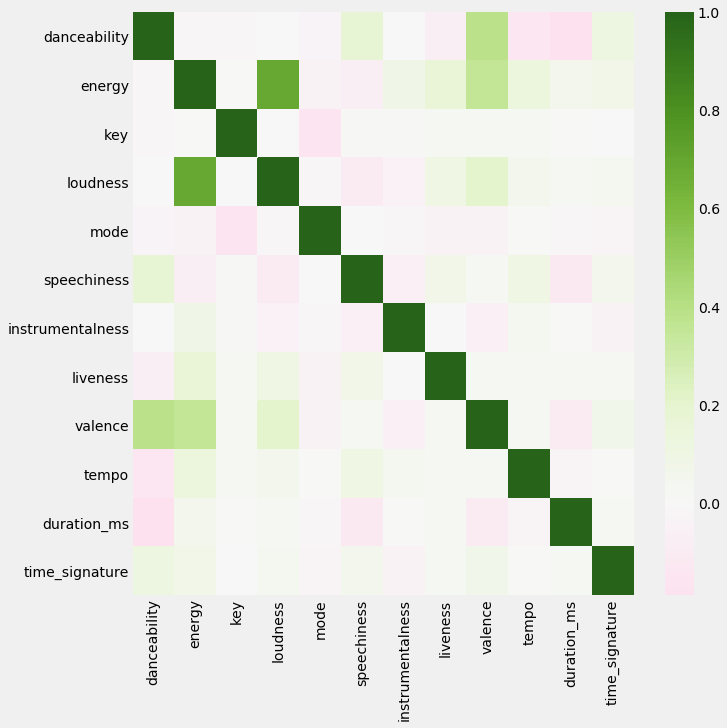

In [6]:
fig = plt.figure(figsize = (10,10))
sns.heatmap(all_songs.corr(),cmap = 'PiYG', center = 0)

In [7]:
#Out of 4778 songs, we have 1449 unique artists
all_songs.artist.nunique()

1449

In [8]:
hist['seconds']=hist['msPlayed']/1000

In [9]:
hist.drop(columns = 'msPlayed',inplace=True)

In [10]:
hist

,Unnamed: 0,endTime,artistName,trackName,seconds
0,0,2019-09-20 18:05,Elvis Presley,From a Jack to a King,147.973
1,1,2019-09-20 18:08,Elvis Presley,From a Jack to a King,147.973
2,2,2019-09-20 18:26,Marty Robbins,Devil Woman,130.966
3,3,2019-09-21 17:49,Marty Robbins,Devil Woman,6.843
4,4,2019-09-21 17:49,Jimi Hendrix,May This Be Love,39.967
...,...,...,...,...,...
8850,8850,2020-09-18 23:53,Future,Champagne Shower,189.910
8851,8851,2020-09-18 23:54,Lil Dicky,Classic Male Pregame,14.183
8852,8852,2020-09-18 23:54,MAKJ,Party Till We Die (feat. Andrew W.K.),4.974
8853,8853,2020-09-18 23:54,ScHoolboy Q,Los Awesome,19.271


Text(0.5, 1.0, 'Runtime History')

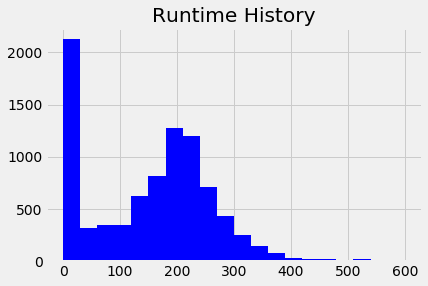

In [11]:
plt.hist(hist['seconds'],bins=20,range = (0,600), color = 'b')
plt.title('Runtime History')

We can see that we skipp about a quarter of the songs that come on

Let's engineer a column called 'Skip' where it counts the number of times that we have skipped a certain song

We will also create a column called 'Play' where it counts the number of times we have let a song play

Even though just having a skip columns would serve the same purpose, I would like both for visualization purposes

---
We will use 60 seconds as the cutoff points for play or skip

In [12]:
hist['skip'] = np.where(hist['seconds']<60,1,0)
hist['play'] = np.where(hist['seconds']>=60,1,0)

In [13]:
hist.head()

,Unnamed: 0,endTime,artistName,trackName,seconds,skip,play
0,0,2019-09-20 18:05,Elvis Presley,From a Jack to a King,147.973,0,1
1,1,2019-09-20 18:08,Elvis Presley,From a Jack to a King,147.973,0,1
2,2,2019-09-20 18:26,Marty Robbins,Devil Woman,130.966,0,1
3,3,2019-09-21 17:49,Marty Robbins,Devil Woman,6.843,1,0
4,4,2019-09-21 17:49,Jimi Hendrix,May This Be Love,39.967,1,0


In [14]:
tracks = hist.groupby(['trackName','artistName']).agg({'skip':'sum', 'play': 'sum'}).reset_index()

In [15]:
tracks.head()

,trackName,artistName,skip,play
0,"""C"" is for Cookie",Cookie Monster,1,0
1,$ave Dat Money (feat. Fetty Wap & Rich Homie Q...,Lil Dicky,1,1
2,'Round Here,IODONTPLAY,0,2
3,'Till I Collapse,Eminem,1,1
4,(Bonus) Air Canada,RiFF Raff & DOLLABiLLGATES,0,2


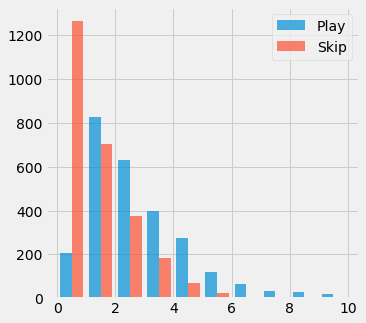

In [16]:
fig, ax = plt.subplots(figsize = (5,5))


play = tracks['play']
skip = tracks['skip']
plt.hist([play,skip], bins  = 10, range = (0,10),alpha = 0.7, label = ['Play','Skip'])
plt.legend(loc='upper right')

We can see that there are a lot more skips with a low total playcount... this could be due to spotify not offering us songs after we skip them once

We also see there aren't any songs that are skipped more than 5 times... Spotify seems to stop giving us songs after we skip them a few times

### Now let's define what songs we enjoy
Any song that has a 75% ratio of plays/skips can be considered enjoyable

In [17]:
tracks['like'] = np.where(tracks['play']/(tracks['skip']+tracks['play'])>=0.75,1,0)

In [18]:
tracks.head(5)

,trackName,artistName,skip,play,like
0,"""C"" is for Cookie",Cookie Monster,1,0,0
1,$ave Dat Money (feat. Fetty Wap & Rich Homie Q...,Lil Dicky,1,1,0
2,'Round Here,IODONTPLAY,0,2,1
3,'Till I Collapse,Eminem,1,1,0
4,(Bonus) Air Canada,RiFF Raff & DOLLABiLLGATES,0,2,1


In [31]:
tracks.trackName.nunique()

2584

In [32]:
len(tracks)

2630

In [41]:
#Find if some songs have same name but different artist
a = tracks.groupby('trackName').artistName.count().reset_index()
a[a['artistName']>1].head()

,trackName,artistName
216,Believer,2
286,Bounce,2
375,Chant,2
503,Daybreak,2
504,Daydream,2


### Bring in Features for my song history

In the Song Collection notebook, I have gotten all of the features for songs that I played in the past year as long as they had been played or skipped twice.

I will now read that df into this notebook, so that I can merge it with the skip/play/like features above

In [19]:
my_song_features = pd.read_csv(r'C:\Users\charl\Python\GitHub Projects\Spotify_Project\MyData\songs_for_personal_analysis.csv')

In [23]:
len(my_song_features)

1837

In [49]:
df = pd.merge(my_song_features, tracks,  how='left', on=['trackName','artistName'])
len(df)

1837

In [50]:
df.drop(columns = 'Unnamed: 0',inplace= True)

In [51]:
df.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,trackName,artistName,skip,play,like
0,5Le9sSLxWIaIEPPppZ9EuF,0.3300,0.673,254118.0,0.8000,0.0000,7.0,0.689,-6.253,1.0,0.2140,135.997,4.0,0.268,'Round Here,IODONTPLAY,0,2,1
1,5F7bIFd3xWuoXmvXFqFl5M,0.0825,0.744,365950.0,0.5700,0.0000,3.0,0.121,-4.359,0.0,0.0357,75.019,4.0,0.600,(Bonus) Air Canada,RiFF Raff & DOLLABiLLGATES,0,2,1
2,2PzU4IB8Dr6mxV3lHuaG34,0.0383,0.723,222813.0,0.8630,0.0317,2.0,0.128,-7.890,1.0,0.0338,136.302,4.0,0.931,(I Can't Get No) Satisfaction - Mono Version,The Rolling Stones,2,9,1
3,3qLfQNPEE27KI3Hgd9Om8A,0.9910,0.295,135653.0,0.0706,0.9200,9.0,0.101,-20.157,0.0,0.0439,76.425,1.0,0.139,(prelude),Zachary Bruno,0,2,1
4,4txn9qnwK3ILQqv5oq2mO3,0.3880,0.519,264213.0,0.8090,0.0000,1.0,0.275,-6.362,1.0,0.5560,146.020,4.0,0.262,03' Adolescence,J. Cole,1,4,1


## Finally, we have our dataframe of songs I have listened to in the past year that include their features and if I enjoy them